In [1]:
import pandas as pd
import numpy as np

In [2]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [3]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


In [4]:
# filtrando apenas os registros em que a medida estatística é "quilograma"
df1=df[df["CO_UNID"]==10]

In [5]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713
1764424,2019-08,29221999,10,767,SP,4,817700,1,1,476,4.019382,3.778713
1764425,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,4.019382,3.778713
1764426,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,4.019382,3.778713


###### Checando códigos NCM recorrentes

In [6]:
# checando quais os códigos NCM mais recorrentes, tendo em vista que não foi possível "dummizar" todos em teste anteriormente realizado
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
3314,39269090,11504
4912,73181500,9334
4948,73269090,8381
3395,40169300,8064
5542,85444200,7518
...,...,...
3785,52101910,1
1244,29038190,1
1252,29039916,1
1253,29039919,1


In [7]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [8]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [9]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [10]:
g2.head()

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
3314,39269090,11504,0.011751,0.011751
4912,73181500,9334,0.009535,0.021286
4948,73269090,8381,0.008561,0.029847
3395,40169300,8064,0.008237,0.038084
5542,85444200,7518,0.007679,0.045763


In [11]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 2828 códigos NCM dentre os 5809.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
3314,39269090,11504,0.011751,0.011751
4912,73181500,9334,0.009535,0.021286
4948,73269090,8381,0.008561,0.029847
3395,40169300,8064,0.008237,0.038084
5542,85444200,7518,0.007679,0.045763
...,...,...,...,...
2285,29419061,48,0.000049,0.949799
3904,54071029,48,0.000049,0.949848
4974,74092100,48,0.000049,0.949897
2655,33012917,48,0.000049,0.949946


In [12]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
2498,30063019,48,0.000049,0.950044
276,9042100,48,0.000049,0.950094
1134,28417010,48,0.000049,0.950143
4680,72119010,48,0.000049,0.950192
5017,75022000,48,0.000049,0.950241
...,...,...,...,...
3785,52101910,1,0.000001,0.999996
1244,29038190,1,0.000001,0.999997
1252,29039916,1,0.000001,0.999998
1253,29039919,1,0.000001,0.999999


In [13]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [14]:
mask=df1['CO_NCM'].isin(idx)
mask

2          False
3          False
4          False
5          False
7          False
           ...  
1764423    False
1764424    False
1764425    False
1764426    False
1764429     True
Name: CO_NCM, Length: 978971, dtype: bool

In [15]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-15-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [16]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725,39263000
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725,38249929
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725,34021300
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,85389090
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,85030010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84339090
1764424,2019-08,29221999,10,767,SP,4,817700,1,1,476,4.019382,3.778713,29221999
1764425,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,4.019382,3.778713,12122900
1764426,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,4.019382,3.778713,39079919


In [18]:
df1["CO_NCM_final"].value_counts()

99999999    48953
39269090    11504
73181500     9334
73269090     8381
40169300     8064
            ...  
49040000       48
29419041       48
29419061       48
33012917       48
54071029       48
Name: CO_NCM_final, Length: 2829, dtype: int64

###### Não há necessidade de trabalhar com a variável ref aos códigos UNID MED EST (CO_UNID) recorrentes, pois o df está restrito ao CO_UNID=10

###### Checando países (CO_PAIS) recorrentes

In [19]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
39,160,181397
62,249,122542
3,23,89406
97,386,58879
69,275,39455
...,...,...
188,795,1
175,754,1
26,99,1
22,90,1


In [20]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [21]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [22]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [23]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
39,160,181397,0.185294,0.185294
62,249,122542,0.125174,0.310468
3,23,89406,0.091327,0.401794
97,386,58879,0.060144,0.461938
69,275,39455,0.040303,0.502241


In [24]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restringem a 38 países dentre os 208.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 39 to 61
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           38 non-null     int64  
 1   contagem          38 non-null     int64  
 2   % CO_PAIS         38 non-null     float64
 3   % CO_PAIS ACUMUL  38 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [25]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
43,169,3474,0.003549,0.950439
147,586,3283,0.003354,0.953792
136,538,3258,0.003328,0.957120
94,375,3063,0.003129,0.960249
161,676,2887,0.002949,0.963198
...,...,...,...,...
188,795,1,0.000001,0.999996
175,754,1,0.000001,0.999997
26,99,1,0.000001,0.999998
22,90,1,0.000001,0.999999


In [26]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [27]:
mask=df1['CO_PAIS'].isin(idx)
mask

2          False
3          False
4          False
5          False
7          False
           ...  
1764423    False
1764424    False
1764425     True
1764426    False
1764429    False
Name: CO_PAIS, Length: 978971, dtype: bool

In [28]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-28-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [29]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_PAIS_final
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725,39263000,23
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725,38249929,493
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725,34021300,493
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,85389090,386
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,85030010,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84339090,63
1764424,2019-08,29221999,10,767,SP,4,817700,1,1,476,4.019382,3.778713,29221999,767
1764425,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,4.019382,3.778713,12122900,999
1764426,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,4.019382,3.778713,39079919,275


In [31]:
df1["CO_PAIS_final"].value_counts()

160    181397
249    122542
23      89406
386     58879
999     51993
275     39455
399     38081
245     31022
361     30969
628     26370
190     25767
161     22602
493     19334
63      19126
767     16355
764     16085
573     15807
87      13206
149     12847
72      12593
351     10937
776     10921
791     10912
603     10455
827      9967
232      8571
607      8161
271      7646
365      7596
858      6813
455      6509
355      6316
158      5855
383      4471
741      4298
845      4106
670      4031
105      3928
247      3642
Name: CO_PAIS_final, dtype: int64

###### Checando unidades federadas (SG_UF_NCM) recorrentes

In [32]:
g1=df1.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,386469
23,SC,115400
17,PR,81479
18,RJ,72933
10,MG,68977
22,RS,63820
2,AM,42779
4,BA,25761
7,ES,20858
8,GO,17710


In [33]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [34]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [35]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [36]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,386469,0.394771,0.394771
23,SC,115400,0.117879,0.512650
17,PR,81479,0.083229,0.595879
18,RJ,72933,0.074500,0.670378
10,MG,68977,0.070459,0.740837


In [37]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável SG_UF_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restringem a 12 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,386469,0.394771,0.394771
23,SC,115400,0.117879,0.512650
17,PR,81479,0.083229,0.595879
18,RJ,72933,0.074500,0.670378
10,MG,68977,0.070459,0.740837
22,RS,63820,0.065191,0.806028
2,AM,42779,0.043698,0.849726
4,BA,25761,0.026314,0.876040
7,ES,20858,0.021306,0.897346
8,GO,17710,0.018090,0.915437


In [38]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
20,RO,11216,0.011457,0.957697
1,AL,9702,0.009910,0.967608
13,PA,7620,0.007784,0.975392
11,MS,5210,0.005322,0.980713
6,DF,3674,0.003753,0.984466
14,PB,3035,0.003100,0.987567
19,RN,2937,0.003000,0.990567
24,SE,2573,0.002628,0.993195
12,MT,2432,0.002484,0.995679
9,MA,1311,0.001339,0.997018


In [39]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [40]:
mask=df1['SG_UF_NCM'].isin(idx)
mask

2          False
3          False
4          False
5          False
7          False
           ...  
1764423    False
1764424    False
1764425    False
1764426    False
1764429    False
Name: SG_UF_NCM, Length: 978971, dtype: bool

In [41]:
df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]

<ipython-input-41-dd95862fade3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]


In [42]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "SG_UF_NCM_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [43]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_PAIS_final,SG_UF_NCM_final
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725,39263000,23,SP
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725,38249929,493,SP
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725,34021300,493,BA
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,85389090,386,SC
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,85030010,386,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764423,2019-08,84339090,10,63,RS,7,1017500,25285,25285,54569,4.019382,3.778713,84339090,63,RS
1764424,2019-08,29221999,10,767,SP,4,817700,1,1,476,4.019382,3.778713,29221999,767,SP
1764425,2019-08,12122900,10,538,SP,1,817800,5000,5000,45153,4.019382,3.778713,12122900,999,SP
1764426,2019-08,39079919,10,275,SP,1,817800,2560,2560,6943,4.019382,3.778713,39079919,275,SP


In [44]:
df1["SG_UF_NCM_final"].value_counts()

SP    386469
SC    115400
PR     81479
RJ     72933
MG     68977
RS     63820
99     52629
AM     42779
BA     25761
ES     20858
GO     17710
PE     16209
CE     13947
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [45]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
1,1,545000
3,4,396123
6,7,27424
0,0,9422
9,10,712
4,5,166
8,9,52
5,6,37
7,8,20
2,2,15


In [46]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [47]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [48]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [49]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
1,1,545000,0.556707,0.556707
3,4,396123,0.404632,0.961339
6,7,27424,0.028013,0.989352
0,0,9422,0.009624,0.998976
9,10,712,0.000727,0.999704
4,5,166,0.000170,0.999873
8,9,52,0.000053,0.999926
5,6,37,0.000038,0.999964
7,8,20,0.000020,0.999985
2,2,15,0.000015,1.000000


In [50]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-50-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [51]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [52]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [53]:
df1["CO_VIA_final"].value_counts()

1     545000
4     396123
7      27424
99     10424
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [54]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-54-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [55]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [56]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,1
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,1
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_96151100,NCM_96151900,NCM_96159000,NCM_96161000,NCM_96162000,NCM_96170010,NCM_96170020,NCM_96180000,NCM_96190000,NCM_99999999
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,0
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,0
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Não precisa trabalhar com a variável CO_UNID, pois esse df é uma fração do df original (mediante filtro CO_UNID=10)
#df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
#df_encoded.head(3)

In [58]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_670,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_845,Pais_858,Pais_999
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,0
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,0
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_CE,UF_ES,UF_GO,UF_MG,UF_PE,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,0,0,0,0,1
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,0,0,0,0,1
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_PE,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,...,0,0,0,0,0,1,1,0,0,0
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,...,0,0,0,0,0,1,1,0,0,0
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,...,0,0,0,0,0,0,1,0,0,0


In [61]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [62]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06',
       ...
       'UF_PE', 'UF_PR', 'UF_RJ', 'UF_RS', 'UF_SC', 'UF_SP', 'Modal_1',
       'Modal_4', 'Modal_7', 'Modal_99'],
      dtype='object', length=2901)

In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 2901 entries, QT_ESTAT to Modal_99
dtypes: float64(3), int64(1), uint8(2897)
memory usage: 2.7 GB


Devido a problemas de falta de memória para o cálculo da correlação das variáveis do df_encoded com a variável alvo df_encoded ["VL_FOB/QT_ESTAT"], optou-se por fracionar o df_encoded, dividindo-o em 6 partes, mantendo-se, em todas elas, a variável alvo VL_FOB/QT_ESTAT e, desse forma, tentar calcular a correlação em partes (o importante seria manter a variável alvo, pois o que se busca é identificar quais as variáveis do df_encoded mais se relacionam com a variável alvo e, dessa forma, adotá-las para a implementação do modelo de ML)

In [64]:
df_encoded1de6=df_encoded.iloc[:,:500]

In [65]:
df_encoded1de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 500 entries, QT_ESTAT to NCM_29071910
dtypes: float64(3), int64(1), uint8(496)
memory usage: 540.4 MB


In [66]:
df_encoded2de6=df_encoded.iloc[:,500:1000]

In [67]:
df_encoded2de6["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"] 

In [68]:
df_encoded2de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 501 entries, NCM_29071990 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(500)
memory usage: 521.7 MB


In [69]:
df_encoded3de6=df_encoded.iloc[:,1000:1500]

In [70]:
df_encoded3de6["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"] 

In [71]:
df_encoded3de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 501 entries, NCM_33012921 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(500)
memory usage: 521.7 MB


In [72]:
df_encoded4de6=df_encoded.iloc[:,1500:2000]

In [73]:
df_encoded4de6["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"] 

In [74]:
df_encoded4de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 501 entries, NCM_46029000 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(500)
memory usage: 521.7 MB


In [75]:
df_encoded5de6=df_encoded.iloc[:,2000:2500]

In [76]:
df_encoded5de6["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"] 

In [77]:
df_encoded5de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 501 entries, NCM_72051000 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(500)
memory usage: 521.7 MB


In [78]:
df_encoded6de6=df_encoded.iloc[:,2500:]

In [79]:
df_encoded6de6["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"] 

In [80]:
df_encoded6de6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Columns: 402 entries, NCM_84439980 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(401)
memory usage: 429.3 MB


In [ ]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
#correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
#correlacoes

In [81]:
# como o cálculo das correlações para todo o df_encoded (código imediatamente acima) deu erro, faremos por partes:
correlacoes1de6 = df_encoded1de6.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes1de6

NCM_28030090       0.000005
NCM_28432100       0.000010
NCM_28469090       0.000027
NCM_29029090       0.000055
NCM_28500090       0.000059
                     ...   
NCM_12093000       0.002280
NCM_28459000       0.004959
NCM_28439090       0.005761
NCM_28444090       0.006416
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 500, dtype: float64

In [82]:
correlacoes2de6 = df_encoded2de6.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes2de6

NCM_29333946       0.000002
NCM_30043939       0.000006
NCM_29309019       0.000007
NCM_29270029       0.000009
NCM_29269095       0.000009
                     ...   
NCM_30021520       0.025593
NCM_30049019       0.036975
NCM_30021590       0.044536
NCM_30049079       0.109478
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 501, dtype: float64

In [83]:
correlacoes3de6 = df_encoded3de6.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes3de6

NCM_39140090       5.369473e-07
NCM_40101100       5.722784e-06
NCM_42050000       1.258969e-05
NCM_42010010       2.212769e-05
NCM_39061000       3.467268e-05
                       ...     
NCM_39269090       1.420198e-03
NCM_35079039       1.443606e-03
NCM_38220090       1.793042e-03
NCM_38180010       3.464044e-03
VL_FOB/QT_ESTAT    1.000000e+00
Name: VL_FOB/QT_ESTAT, Length: 501, dtype: float64

In [84]:
correlacoes4de6 = df_encoded4de6.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes4de6

NCM_67030000       0.000006
NCM_68042111       0.000007
NCM_70179000       0.000009
NCM_49089000       0.000011
NCM_59112010       0.000014
                     ...   
NCM_71162010       0.001408
NCM_71131100       0.001556
NCM_49070090       0.001754
NCM_71131900       0.025522
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 501, dtype: float64

In [85]:
correlacoes5de6 = df_encoded5de6.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes5de6

NCM_84419000       2.240416e-07
NCM_82074010       3.081572e-07
NCM_74032900       2.836683e-06
NCM_81059010       3.030879e-06
NCM_82090019       5.056504e-06
                       ...     
NCM_73181500       1.424796e-03
NCM_75089090       2.405136e-03
NCM_84119900       3.013465e-03
NCM_84119100       9.275682e-03
VL_FOB/QT_ESTAT    1.000000e+00
Name: VL_FOB/QT_ESTAT, Length: 501, dtype: float64

In [86]:
correlacoes6de6 = df_encoded6de6.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes6de6

NCM_84483220       0.000002
NCM_84483929       0.000002
NCM_84669360       0.000002
NCM_84485910       0.000004
NCM_84485922       0.000005
                     ...   
NCM_90219081       0.014362
Modal_1            0.019881
UF_GO              0.020892
Modal_4            0.021281
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 402, dtype: float64

In [87]:
correlacoes = pd.concat([correlacoes1de6, correlacoes2de6, correlacoes3de6, correlacoes4de6, correlacoes5de6, correlacoes6de6])

In [88]:
correlacoes.drop_duplicates(inplace=True)

In [89]:
correlacoes.sort_values(ascending=False).head(20)

VL_FOB/QT_ESTAT    1.000000
NCM_30049079       0.109478
NCM_30021590       0.044536
NCM_30049019       0.036975
NCM_30021520       0.025593
NCM_71131900       0.025522
NCM_30029092       0.023121
Modal_4            0.021281
UF_GO              0.020892
Modal_1            0.019881
NCM_30049068       0.016838
NCM_90219081       0.014362
NCM_29397990       0.012105
NCM_30049069       0.010348
NCM_29242999       0.009736
NCM_84119100       0.009276
NCM_30066000       0.009270
NCM_90213930       0.009172
NCM_99999999       0.008292
NCM_29419059       0.007836
Name: VL_FOB/QT_ESTAT, dtype: float64

In [90]:
# Identificando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.01]).index

Index(['VL_FOB/QT_ESTAT', 'NCM_30049069', 'NCM_29397990', 'NCM_30049068',
       'NCM_30029092', 'NCM_30021520', 'NCM_30049019', 'NCM_30021590',
       'NCM_30049079', 'NCM_71131900', 'NCM_90219081', 'Modal_1', 'UF_GO',
       'Modal_4'],
      dtype='object')

In [91]:
df2 = df_encoded[(correlacoes[correlacoes >= 0.01]).index]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978971 entries, 2 to 1764429
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VL_FOB/QT_ESTAT  978971 non-null  float64
 1   NCM_30049069     978971 non-null  uint8  
 2   NCM_29397990     978971 non-null  uint8  
 3   NCM_30049068     978971 non-null  uint8  
 4   NCM_30029092     978971 non-null  uint8  
 5   NCM_30021520     978971 non-null  uint8  
 6   NCM_30049019     978971 non-null  uint8  
 7   NCM_30021590     978971 non-null  uint8  
 8   NCM_30049079     978971 non-null  uint8  
 9   NCM_71131900     978971 non-null  uint8  
 10  NCM_90219081     978971 non-null  uint8  
 11  Modal_1          978971 non-null  uint8  
 12  UF_GO            978971 non-null  uint8  
 13  Modal_4          978971 non-null  uint8  
dtypes: float64(1), uint8(13)
memory usage: 67.1 MB


In [92]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

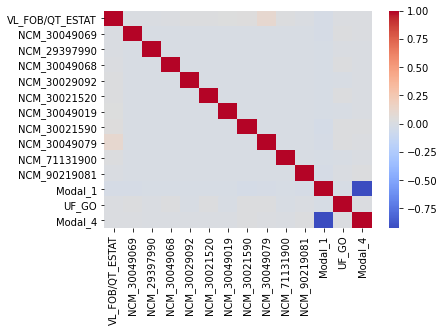

In [93]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

In [95]:
#Considerando que as Modal_1 e Modal_4 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df2=df2.drop(columns="Modal_4")

KeyError: "['Modal_4'] not found in axis"

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [97]:
df2.columns

Index(['VL_FOB/QT_ESTAT', 'NCM_30049069', 'NCM_29397990', 'NCM_30049068',
       'NCM_30029092', 'NCM_30021520', 'NCM_30049019', 'NCM_30021590',
       'NCM_30049079', 'NCM_71131900', 'NCM_90219081', 'Modal_1', 'UF_GO'],
      dtype='object')

In [98]:
x = df2[['NCM_30049069', 'NCM_29397990', 'NCM_30049068',
       'NCM_30029092', 'NCM_30021520', 'NCM_30049019', 'NCM_30021590',
       'NCM_30049079', 'NCM_71131900', 'NCM_90219081', 'Modal_1', 'UF_GO']]
y = df2['VL_FOB/QT_ESTAT']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm = LinearRegression()

In [103]:
lm.fit(x_train,y_train)

LinearRegression()

In [104]:
# impressão do intercepto
print(lm.intercept_)

480.8685406810295


In [105]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
NCM_30049069,5811.022224
NCM_29397990,21582.125753
NCM_30049068,26614.058385
NCM_30029092,35286.974197
NCM_30021520,53418.749461
NCM_30049019,55167.451921
NCM_30021590,29615.555746
NCM_30049079,59871.382105
NCM_71131900,51032.022797
NCM_90219081,11939.637705


In [106]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [108]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [111]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [112]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [113]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [114]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

28803.38458179516

In [115]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

28742.108746445985

In [116]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

28739.58113205042

#### Mean absolute error - MAE

In [117]:
from sklearn.metrics import mean_absolute_error

In [118]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

523.7908786495432

In [119]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

505.09102739179616

In [120]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

504.70045936368183

#### Mean squared error - MSE

In [121]:
from sklearn.metrics import mean_absolute_error

In [122]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

829634963.3667951

In [123]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

826108815.1925267

In [124]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

825963523.6457087

#### Coeficente de determinação - R²

In [125]:
from sklearn.metrics import r2_score

In [126]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

0.015398796680243021

In [127]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

0.01958358865354537

In [128]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

0.019756018985132018